In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
# Load the dataset
file_path = '/content/data_ready_final.xlsx'
df = pd.read_excel(file_path)

# Assuming the relevant text column is named 'text_berita_clean'
documents = df['text_berita_clean']

In [ ]:
# Display the DataFrame
print(df.head())

                                               judul  \
0  Tak Mampu Bayar Iuran, Bisakah Menonaktifkan B...   
1           Cara Pindah Faskes BPJS Kesehatan Online   
2  Dirut BPJS: Dokter Asing Boleh Layani Pasien B...   
3  Sejahterakan Pekerja, BPJS Ketenagakerjaan Kuc...   
4  Tingkatkan Kualitas Layanan Faskes, BPJS Keseh...   

                                                tags  \
0  BPJS Kesehatan, BPJS Kesehatan PBI, bpjs keseh...   
1  Cara Pindah Faskes BPJS Kesehatan Online, Cara...   
2          dokter asing, BPJS Kesehatan, pasien BPJS   
3  pekerja, BPJS Ketenagakerjaan, rumah, MLT BPJS...   
4   kesehatan, BPJS Kesehatan, BPJS, layanan, faskes   

                                                link  \
0  https://www.kompas.com/tren/read/2024/09/03/08...   
1  https://nasional.kompas.com/read/2024/07/13/05...   
2  https://nasional.kompas.com/read/2024/05/27/16...   
3  https://kilasbadannegara.kompas.com/bpjs-keten...   
4  https://kilasbadannegara.kompas.com/bpjs-ke

In [ ]:
# Load the dataset
file_path = '/content/data_ready_final.xlsx'
df = pd.read_excel(file_path)  # Use read_excel for .xlsx files

In [ ]:
df

,judul,tags,link,text_berita,tanggal,portal_berita,text_berita_clean
0,"Tak Mampu Bayar Iuran, Bisakah Menonaktifkan B...","BPJS Kesehatan, BPJS Kesehatan PBI, bpjs keseh...",https://www.kompas.com/tren/read/2024/09/03/08...,\nKOMPAS.com - Peserta program Jaminan Kesehat...,03-09-2024,Kompas,serta program jamin sehat nasional jkn bayar i...
1,Cara Pindah Faskes BPJS Kesehatan Online,"Cara Pindah Faskes BPJS Kesehatan Online, Cara...",https://nasional.kompas.com/read/2024/07/13/05...,\n\nKOMPAS.com - Memindahkan fasilitas kesehat...,07-13-2024,Kompas,pindah fasilitas sehat faskes badan selenggara...
2,Dirut BPJS: Dokter Asing Boleh Layani Pasien B...,"dokter asing, BPJS Kesehatan, pasien BPJS",https://nasional.kompas.com/read/2024/05/27/16...,"\n\nJAKARTA, KOMPAS.com - Direktur Utama BPJS ...",05-27-2024,Kompas,jakarta direktur utama bpjs sehat ali ghufron ...
3,"Sejahterakan Pekerja, BPJS Ketenagakerjaan Kuc...","pekerja, BPJS Ketenagakerjaan, rumah, MLT BPJS...",https://kilasbadannegara.kompas.com/bpjs-keten...,\n\nKOMPAS.com - Direktur Pelayanan Badan Pen...,12-16-2023,Kompas,direktur layan badan selenggara jamin sosial b...
4,"Tingkatkan Kualitas Layanan Faskes, BPJS Keseh...","kesehatan, BPJS Kesehatan, BPJS, layanan, faskes",https://kilasbadannegara.kompas.com/bpjs-keseh...,\nKOMPAS.com  Deputi Direksi Bidang Jaminan ...,12-16-2020,Kompas,deputi direksi bidang jamin biaya layan primer...
...,...,...,...,...,...,...,...
5030,Rekam Jejak Kenaikan Iuran BPJS Kesehatan Zama...,"bpjs kesehatan, bpjs",https://www.cnbcindonesia.com/news/20201221175...,"Jakarta, CNBC Indonesia - Pemerintah secara re...",12-21-2020,cnbc,jakarta cnbc indonesia perintah resmi naik iur...
5031,"Transparansi, BPJS Kesehatan Luncurkan Data Sa...","bpjs kesehatan, jkn-kis",https://www.cnbcindonesia.com/news/20201221193...,"Jakarta, CNBC Indonesia- BPJS Kesehatan kini m...",12-21-2020,cnbc,jakarta cnbc bpjs sehat sedia data sampel waki...
5032,"Catat, Perjalanan Kenaikan Iuran BPJS Kesehata...","bpjs kesehatan, bpjs, iuran bpjs",https://www.cnbcindonesia.com/news/20201221120...,"Jakarta, CNBC Indonesia - Pemerintah secara re...",12-21-2020,cnbc,jakarta cnbc indonesia perintah resmi naik iur...
5033,"Catat! Jokowi Janji Vaksin Gratis Warga RI, Ta...","jokowi, vaksin corona ri gratis, vaksin, bnpb2020",https://www.cnbcindonesia.com/news/20201219114...,"Jakarta, CNBC Indonesia - Pekan ini kabar baik...",12-19-2020,cnbc,jakarta cnbc indonesia pekan kabar negeri pres...


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download daftar stopword bahasa Indonesia jika belum ada
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# Tambahkan kata "serta" ke dalam daftar stopword
stop_words.add('serta')

# Baca data dari file Excel
data = pd.read_excel('/content/data_ready_final.xlsx')

# Fungsi untuk menghapus stopword dari teks
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Hapus stopword dari kolom "text_berita_clean"
data['text_berita_clean'] = data['text_berita_clean'].apply(remove_stopwords)

# Simpan kembali data yang sudah dibersihkan
data.to_excel('/content/data_ready_final_v2.xlsx', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


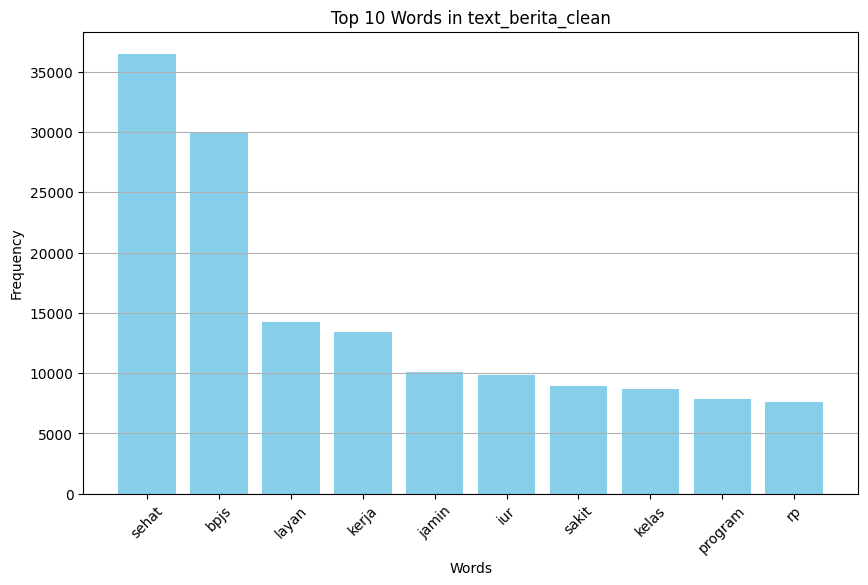

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Baca data dari file Excel yang sudah dibersihkan
data = pd.read_excel('/content/data_ready_final_v2.xlsx')

# Gabungkan semua teks di kolom "text_berita_clean" menjadi satu
all_text = ' '.join(data['text_berita_clean'].dropna())

# Pisahkan kata-kata dan hitung frekuensinya
word_counts = Counter(all_text.split())

# Ambil 10 kata terbanyak
top_10_words = word_counts.most_common(10)

# Buat DataFrame untuk kata dan frekuensinya
top_10_words_df = pd.DataFrame(top_10_words, columns=['Word', 'Frequency'])

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_words_df['Word'], top_10_words_df['Frequency'], color='skyblue')
plt.title('Top 10 Words in text_berita_clean')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Tampilkan plot
plt.show()
